In [147]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr

# Load data from both sheets
df_employee = pd.read_excel('Data.xlsx', sheet_name='Employee')
df_performance = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge the two dataframes on EmployeeID
df = pd.merge(df_employee, df_performance, on='EmployeeID', how='inner')

print(df.head())
# Check for missing values in the dataset
print(df.isnull().sum())
# Display basic information about the dataset (column types, memory usage, etc.)
print(df.info())


# Preprocessing categorical columns for analysis
# Convert 'OverTime', 'Attrition', and 'BusinessTravel' to numeric
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
label_enc = LabelEncoder()
df['BusinessTravel'] = label_enc.fit_transform(df['BusinessTravel'])

  EmployeeID FirstName LastName  Gender  Age BusinessTravel Department  \
0  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
1  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
2  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
3  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
4  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   

   DistanceFromHome State Ethnicity  ...  ReviewDate EnvironmentSatisfaction  \
0                27    IL     White  ...  10/30/2016                       3   
1                27    IL     White  ...  10/30/2017                       4   
2                27    IL     White  ...  10/30/2018                       5   
3                27    IL     White  ...  10/30/2019                       1   
4                27    IL     White  ...  10/31/2014                       3   

  JobSatisfaction RelationshipSatisfaction  TrainingOpportunitiesWithinYea

---

 **_2.Geographic Insights:_**
#### 18.Is there a correlation between overtime work and performance or attrition?
> Approach: We'll analyze the relationship between `OverTime` and `Attrition`

Correlation between OverTime and Attrition:
           OverTime  Attrition
OverTime   1.000000   0.305746
Attrition  0.305746   1.000000


/tmp/ipykernel_5800/3770565197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverTime', y='Attrition', data=df, palette='coolwarm')


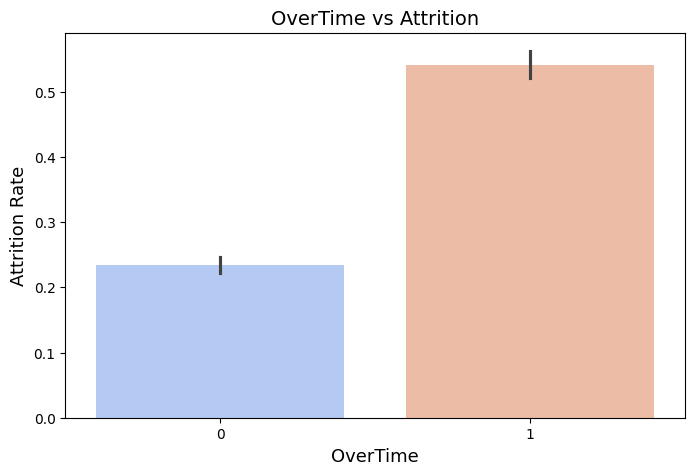

In [12]:
# Calculate correlation between OverTime and Attrition
correlation = df[['OverTime', 'Attrition']].corr()
print(f"Correlation between OverTime and Attrition:\n{correlation}")


# Visualization 
plt.figure(figsize=(8, 5))
sns.barplot(x='OverTime', y='Attrition', data=df, palette='coolwarm')
plt.title('OverTime vs Attrition', fontsize=14)
plt.xlabel('OverTime', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.show()

---
#### 19.How does business travel affect employee satisfaction and retention?
>We analyzed how `BusinessTravel` impacts `JobSatisfaction` and `Attrition` by computing their averages for each category and visualizing the trends using bar plots.

Attrition` by computing their averages for each category and visualizing the trends using bar plots.

Business Travel and Job Satisfaction:
                JobSatisfaction  Attrition
BusinessTravel                            
0                      3.410162   0.483063
1                      3.489362   0.188216
2                      3.428903   0.314346


/tmp/ipykernel_9385/3776121708.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BusinessTravel', y='JobSatisfaction', data=df, palette='viridis')


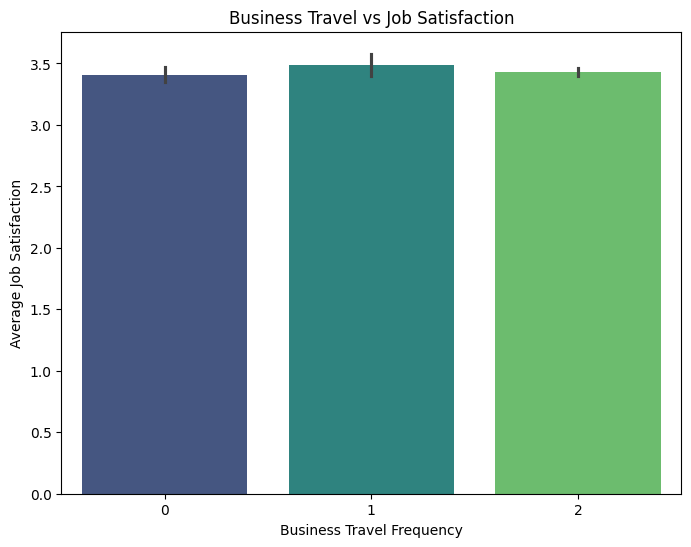

/tmp/ipykernel_9385/3776121708.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BusinessTravel', y='Attrition', data=df, palette='viridis')


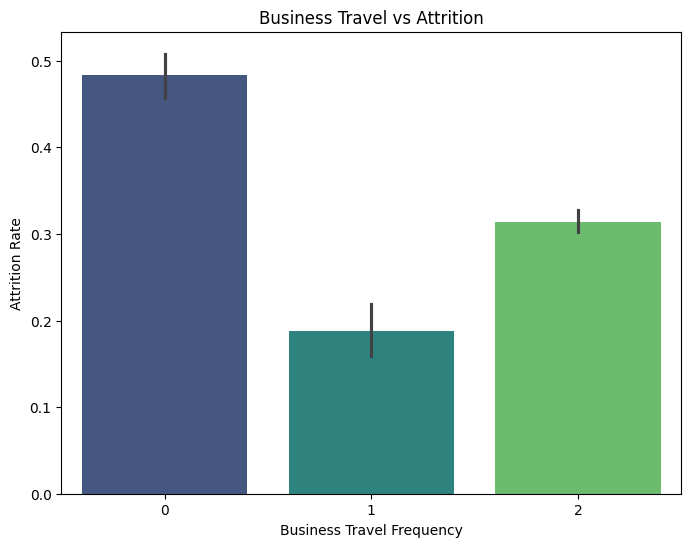

In [6]:
# Average Job Satisfaction and Attrition by Business Travel category
travel_satisfaction = df.groupby('BusinessTravel')[['JobSatisfaction', 'Attrition']].mean()
print(f"Business Travel and Job Satisfaction:\n{travel_satisfaction}")

# Visualization: Business Travel vs Job Satisfaction
plt.figure(figsize=(8, 6))
sns.barplot(x='BusinessTravel', y='JobSatisfaction', data=df, palette='viridis')
plt.title('Business Travel vs Job Satisfaction')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Average Job Satisfaction')
plt.show()

# Visualization: Business Travel vs Attrition
plt.figure(figsize=(8, 6))
sns.barplot(x='BusinessTravel', y='Attrition', data=df, palette='viridis')
plt.title('Business Travel vs Attrition')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate')
plt.show()

---
#### 20.How does the distance from home affect job satisfaction?
>We analyze the relationship between `DistanceFromHome` and `JobSatisfaction` by computing their correlation and visualizing the distribution using a box plot.

Correlation between Distance from Home and Job Satisfaction:
                  DistanceFromHome  JobSatisfaction
DistanceFromHome          1.000000        -0.011745
JobSatisfaction          -0.011745         1.000000


/tmp/ipykernel_5800/1261996237.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobSatisfaction', y='DistanceFromHome', data=df, palette='pastel')


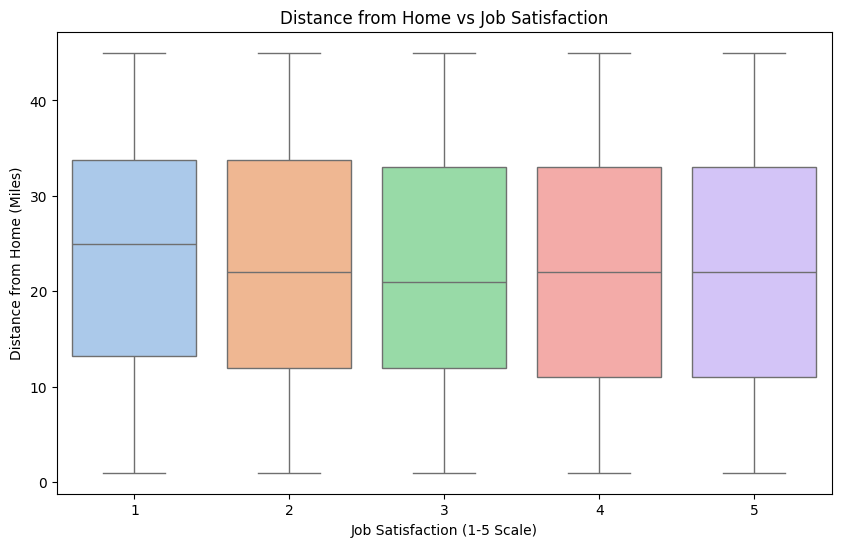

In [26]:
# Correlation between DistanceFromHome and Job Satisfaction
correlation_distance = df[['DistanceFromHome', 'JobSatisfaction']].corr()
print(f"Correlation between Distance from Home and Job Satisfaction:\n{correlation_distance}")

# Assuming 'JobSatisfaction' is a column in the dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobSatisfaction', y='DistanceFromHome', data=df, palette='pastel')
plt.title('Distance from Home vs Job Satisfaction')
plt.xlabel('Job Satisfaction (1-5 Scale)')
plt.ylabel('Distance from Home (Miles)')
plt.show()

---
#### 21.Which states have the highest and lowest attrition rates?
>We’ll group by the `State` column and calculate the `attrition` rate for each state.

Correlation between Work-Life Balance and Job Satisfaction:
                 WorkLifeBalance  JobSatisfaction
WorkLifeBalance         1.000000         0.041724
JobSatisfaction         0.041724         1.000000


/tmp/ipykernel_9385/282711604.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='WorkLifeBalance', y='JobSatisfaction', data=df, palette='mako')


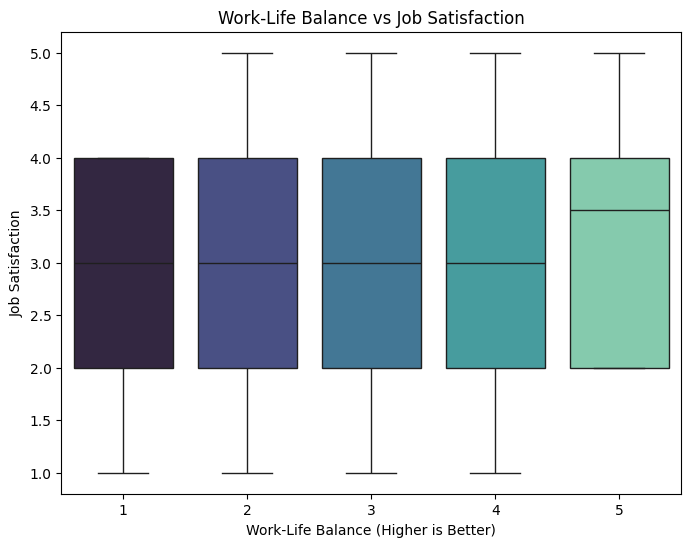

In [ ]:
# Convert 'Attrition' column to numeric (1 for 'Yes', 0 for 'No')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Group by State and calculate the attrition rate
state_attrition = df.groupby('State')['Attrition'].mean().sort_values()

# Print the attrition rates by state
print(f"Attrition Rate by State:\n{state_attrition}")

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=state_attrition.index, y=state_attrition.values, palette='viridis')
plt.title('Attrition Rate by State', fontsize=14)
plt.xlabel('State', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)
plt.xticks(rotation=90)
plt.show()


# or

# Correlation between WorkLifeBalance and Job Satisfaction
correlation_wlb_js = df[['WorkLifeBalance', 'JobSatisfaction']].corr()
print(f"Correlation between Work-Life Balance and Job Satisfaction:\n{correlation_wlb_js}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='WorkLifeBalance', y='JobSatisfaction', data=df, palette='mako')
plt.title('Work-Life Balance vs Job Satisfaction')
plt.xlabel('Work-Life Balance (Higher is Better)')
plt.ylabel('Job Satisfaction')
plt.show()

---
#### 22.Which states have the highest percentage of employees leaving due to excessive overtime?
>We can compute the `Attrition` rate among `OverTime` workers by filtering employees where `Attrition = 1` and `OverTime = 1`, then calculating the percentage per `State`.

Overtime Attrition Rate by State:
State
NY    0.507812
CA    0.554585
IL    0.556054
Name: Attrition, dtype: float64


/tmp/ipykernel_5800/1857248010.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='Reds')


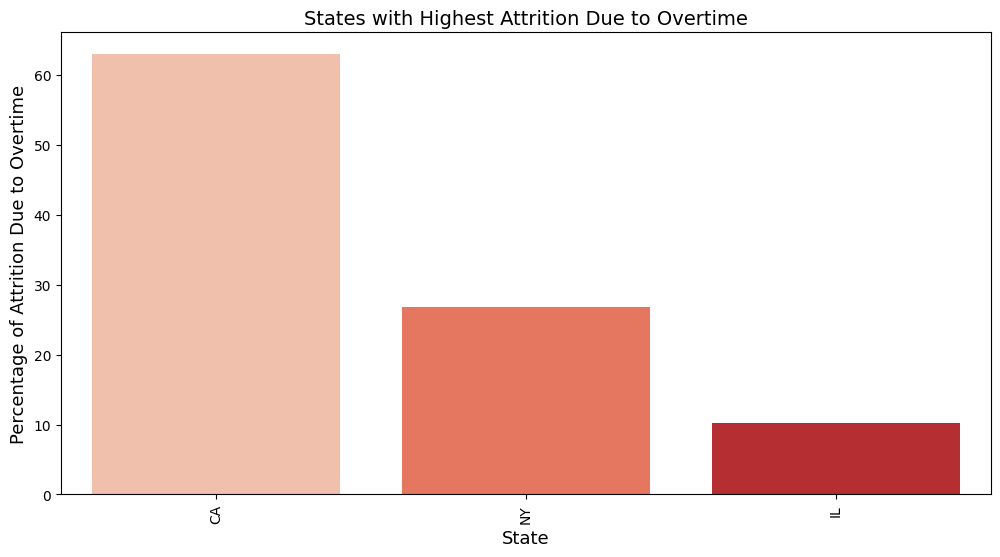

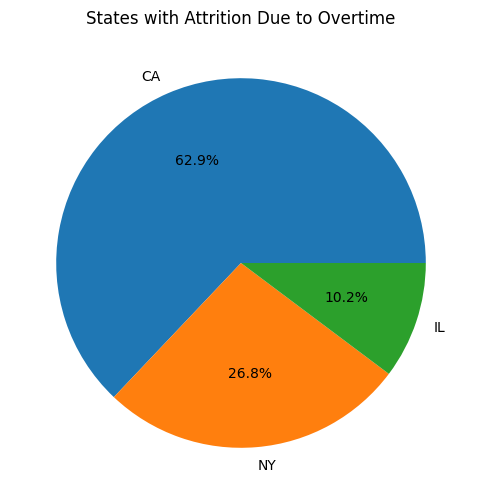

In [ ]:
# Filter for employees who work overtime and calculate attrition rate by state
overtime_attrition = df[df['OverTime'] == 1].groupby('State')['Attrition'].mean().sort_values()

print(f"Overtime Attrition Rate by State:\n{overtime_attrition}")

# Filter employees who left and worked overtime
overtime_attrition = df[(df['Attrition'] == 1) & (df['OverTime'] == 1)]

# Calculate percentage of attrition due to overtime per state
state_counts = (overtime_attrition['State'].value_counts(normalize=True) * 100).sort_values(ascending=False)

# Visualization - Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='Reds')
plt.title('States with Highest Attrition Due to Overtime', fontsize=14)
plt.xlabel('State', fontsize=13)
plt.ylabel('Percentage of Attrition Due to Overtime', fontsize=13)
plt.xticks(rotation=90)
plt.show()

# Visualization -Pie Chart
plt.figure(figsize=(10, 6))
state_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('States with Attrition Due to Overtime')
plt.ylabel('')
plt.show()

---
**_3. Psychographic Insights:_**
#### 23.How does work-life balance affect overall job satisfaction?
>Since we don’t have JobSatisfaction, we can analyze how DistanceFromHome relates to PerformanceRating or Attrition.

Correlation between Distance from Home and Manager Rating:
                  DistanceFromHome  ManagerRating
DistanceFromHome          1.000000       0.025832
ManagerRating             0.025832       1.000000


/tmp/ipykernel_5800/3351033778.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WorkLifeBalance', y='JobSatisfaction', data=df, ci=None, palette='viridis')
/tmp/ipykernel_5800/3351033778.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WorkLifeBalance', y='JobSatisfaction', data=df, ci=None, palette='viridis')


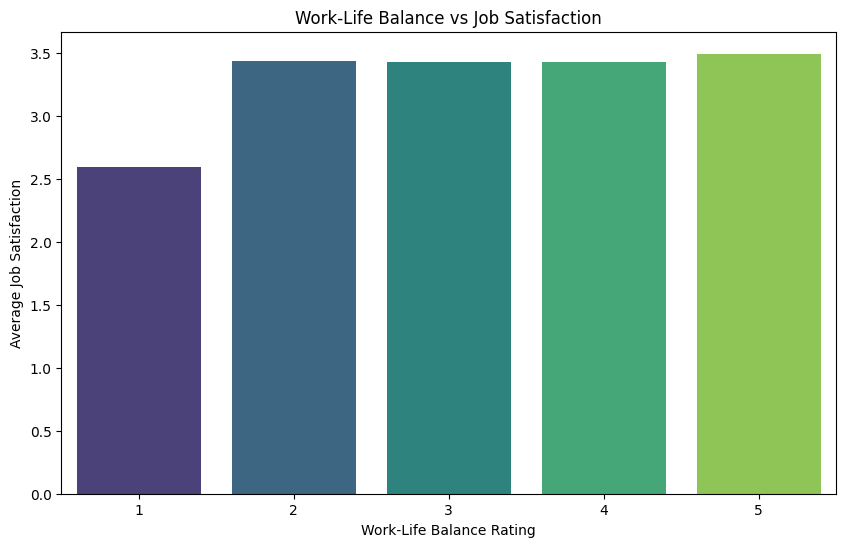

In [28]:

# Calculate correlation between DistanceFromHome and ManagerRating
distance_performance_correlation = df[['DistanceFromHome', 'ManagerRating']].corr()
print(f"Correlation between Distance from Home and Manager Rating:\n{distance_performance_correlation}")

# Assuming 'WorkLifeBalance' and 'JobSatisfaction' are ordinal columns (1-5)
plt.figure(figsize=(10, 6))
sns.barplot(x='WorkLifeBalance', y='JobSatisfaction', data=df, ci=None, palette='viridis')
plt.title('Work-Life Balance vs Job Satisfaction')
plt.xlabel('Work-Life Balance Rating')
plt.ylabel('Average Job Satisfaction')
plt.show()

---
#### 24.Is there a relationship between work-life balance and business travel frequency?
>We can use `BusinessTravel` to analyze its impact on `WorkLifeBalance` ratings and visualize the distribution of work-life balance across different business travel frequencies.

Average Work-Life Balance by Business Travel Frequency:
   BusinessTravel  WorkLifeBalance
0               0         3.400589
1               1         3.402619
2               2         3.420253


/tmp/ipykernel_5800/1754906026.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='BusinessTravel', y='WorkLifeBalance', data=df, palette='Set2')


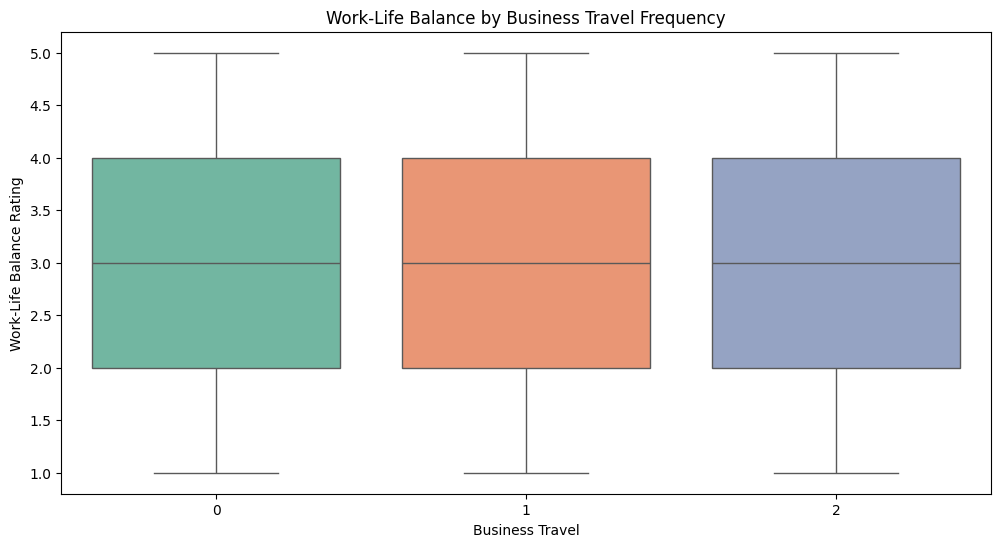

In [41]:
# Calculate the average Work-Life Balance rating for each Business Travel frequency
average_work_life_balance = df.groupby('BusinessTravel')['WorkLifeBalance'].mean().reset_index()

# Display the average Work-Life Balance values
print("Average Work-Life Balance by Business Travel Frequency:")
print(average_work_life_balance)

# Visualize the relationship between Business Travel frequency and Work-Life Balance ratings
plt.figure(figsize=(12, 6))
sns.boxplot(x='BusinessTravel', y='WorkLifeBalance', data=df, palette='Set2')
plt.title('Work-Life Balance by Business Travel Frequency')
plt.xlabel('Business Travel')
plt.ylabel('Work-Life Balance Rating')
plt.show()


---
#### 25.How does participation in training programs impact employee performance?
>We can use `Education` as a proxy for training and skill level to analyze its impact on `Salary`.


--- 8. Impact of education on Salary ---

Average Salary by Education:
Education
1     94983.482353
2    105180.535461
3    115405.430070
4    117641.057789
5    154268.791667
Name: Salary, dtype: float64


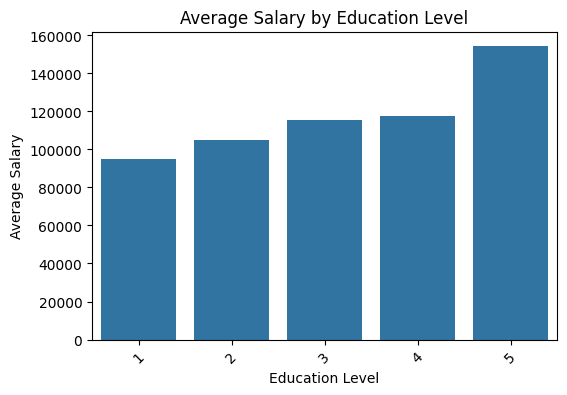

In [83]:
# Note: No specific training column available in the data, using 'Education' as a proxy for training/skill level
print("\n--- 8. Impact of education on Salary ---")
education_salary = df.groupby('Education')['Salary'].mean()
print("\nAverage Salary by Education:")
print(education_salary)
plt.figure(figsize=(6, 4))
sns.barplot(x=education_salary.index, y=education_salary.values)
plt.title("Average Salary by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=45)
plt.show()

---
#### 26.Is there a connection between training and job satisfaction or promotion rates?
>We can use `TrainingOpportunitiesTaken` to evaluate how training affects `JobSatisfaction` and `YearsSinceLastPromotion`.

Average Job Satisfaction and Years Since Last Promotion based on Training Opportunities Taken:
   TrainingOpportunitiesTaken  JobSatisfaction  YearsSinceLastPromotion
0                           0         3.440135                 4.291315
1                           1         3.425171                 4.253668
2                           2         3.430712                 4.203184
3                           3         3.400990                 4.094059


/tmp/ipykernel_5800/3278081931.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TrainingOpportunitiesTaken', y='JobSatisfaction', data=df, ci=None)


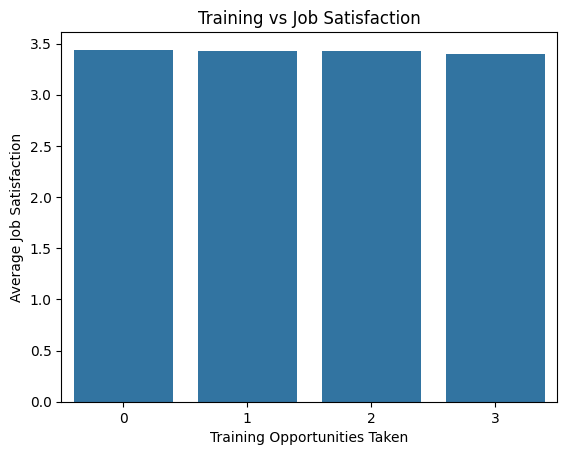

/tmp/ipykernel_5800/3278081931.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='TrainingOpportunitiesTaken', y='YearsSinceLastPromotion', data=df, ci=None)


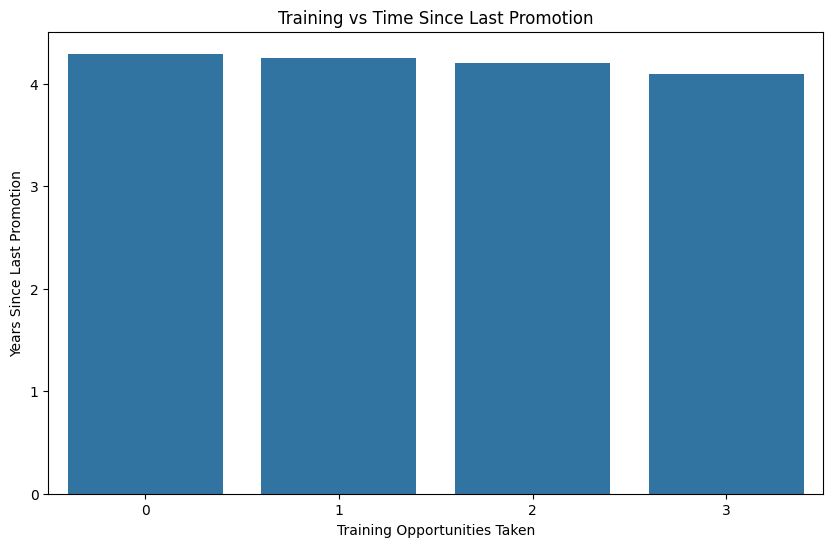

In [55]:
# Calculate average Job Satisfaction and Years Since Last Promotion based on Training Opportunities Taken
training_analysis = df.groupby('TrainingOpportunitiesTaken').agg({
    'JobSatisfaction': 'mean',
    'YearsSinceLastPromotion': 'mean'
}).reset_index()

print("Average Job Satisfaction and Years Since Last Promotion based on Training Opportunities Taken:")
print(training_analysis)


# Visualization
sns.barplot(x='TrainingOpportunitiesTaken', y='JobSatisfaction', data=df, ci=None)
plt.title('Training vs Job Satisfaction')
plt.xlabel('Training Opportunities Taken')
plt.ylabel('Average Job Satisfaction')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='TrainingOpportunitiesTaken', y='YearsSinceLastPromotion', data=df, ci=None)
plt.title('Training vs Time Since Last Promotion')
plt.xlabel('Training Opportunities Taken')
plt.ylabel('Years Since Last Promotion')
plt.show()



---
**_4. Behavioral Insights:_**
#### 27.What are the trends in performance ratings across departments and demographics?
>We will analyze how `PerformanceRating` varies across `Department` and `Gender`.


Performance Rating by Department:
        Department  ManagerRating
0  Human Resources       3.442244
1            Sales       3.449977
2       Technology       3.487432
Performance Rating by Gender:
              Gender  ManagerRating
0             Female       3.486574
1               Male       3.460916
2         Non-Binary       3.482173
3  Prefer Not To Say       3.327869


/tmp/ipykernel_5800/2606737643.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='ManagerRating', data=dept_performance, palette='viridis')


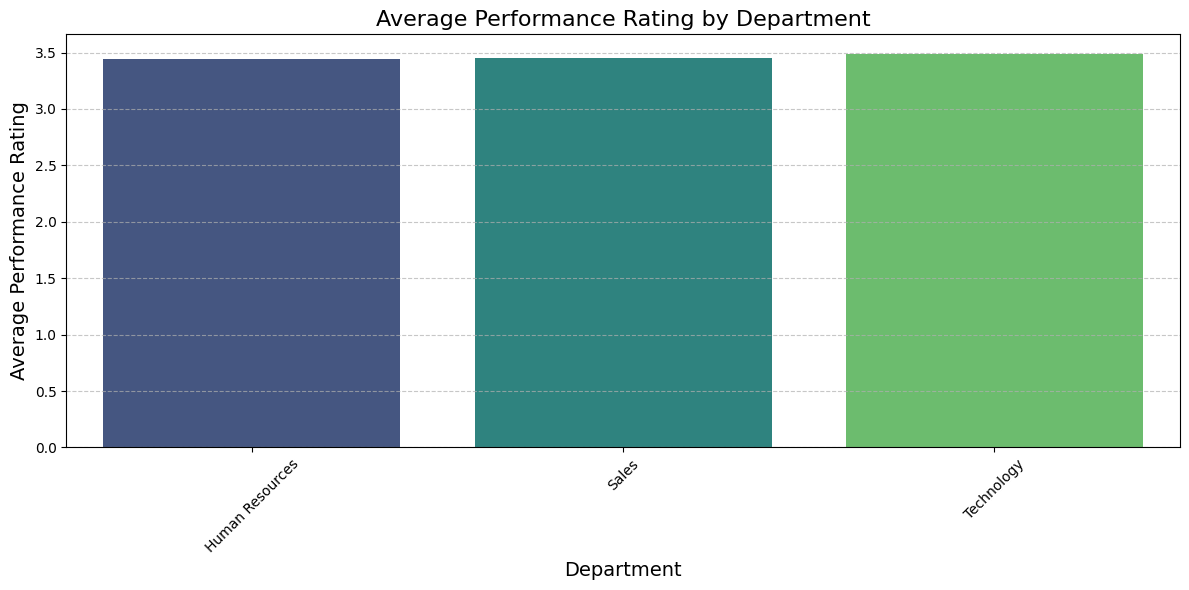

/tmp/ipykernel_5800/2606737643.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='ManagerRating', data=gender_performance, palette='magma')


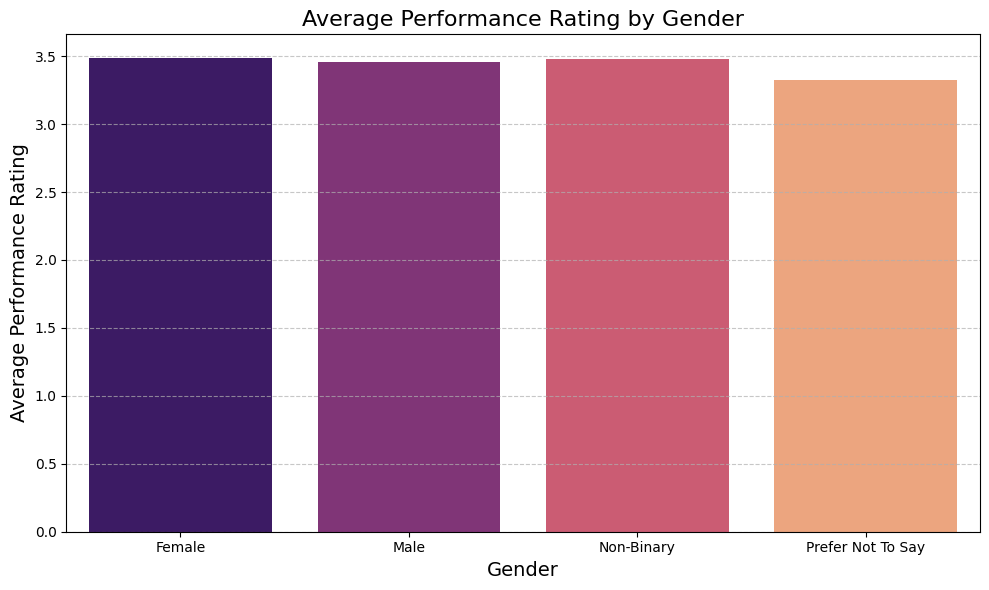

In [92]:
# Performance ratings by department
dept_performance = df.groupby('Department')['ManagerRating'].mean().reset_index()
print(f"Performance Rating by Department:\n{dept_performance}")

# Performance ratings by gender
gender_performance = df.groupby('Gender')['ManagerRating'].mean().reset_index()
print(f"Performance Rating by Gender:\n{gender_performance}")

# Visualization

# Performance Ratings by Department
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='ManagerRating', data=dept_performance, palette='viridis')
plt.title('Average Performance Rating by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Average Performance Rating', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid for better readability
plt.tight_layout()
plt.show()

# Performance Ratings by Gender
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='ManagerRating', data=gender_performance, palette='magma')
plt.title('Average Performance Rating by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Performance Rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid for better readability
plt.tight_layout()
plt.show()


---
#### 28.How does tenure (YearsAtCompany) impact performance and promotion rates?
>To examine this, we can analyze how `YearsAtCompany` affects both `PerformanceRating` and `YearsSinceLastPromotion`.

Average Environment Satisfaction by Tenure (YearsAtCompany):
YearsAtCompany
0     3.885662
1     3.883943
2     3.873529
3     3.828571
4     3.840085
5     3.814532
6     3.808511
7     3.967692
8     3.846980
9     3.887173
10    3.897585
Name: EnvironmentSatisfaction, dtype: float64
Average Years Since Last Promotion by Tenure (YearsAtCompany):
YearsAtCompany
0     0.000000
1     0.343402
2     1.100000
3     1.936264
4     3.014925
5     3.516252
6     4.465957
7     5.276923
8     5.836242
9     6.998812
10    7.774879
Name: YearsSinceLastPromotion, dtype: float64


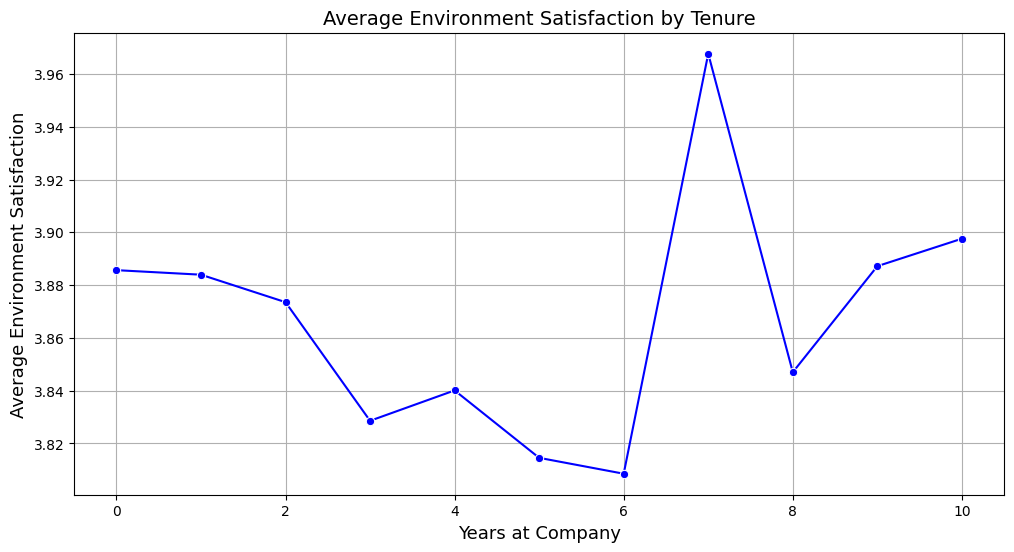

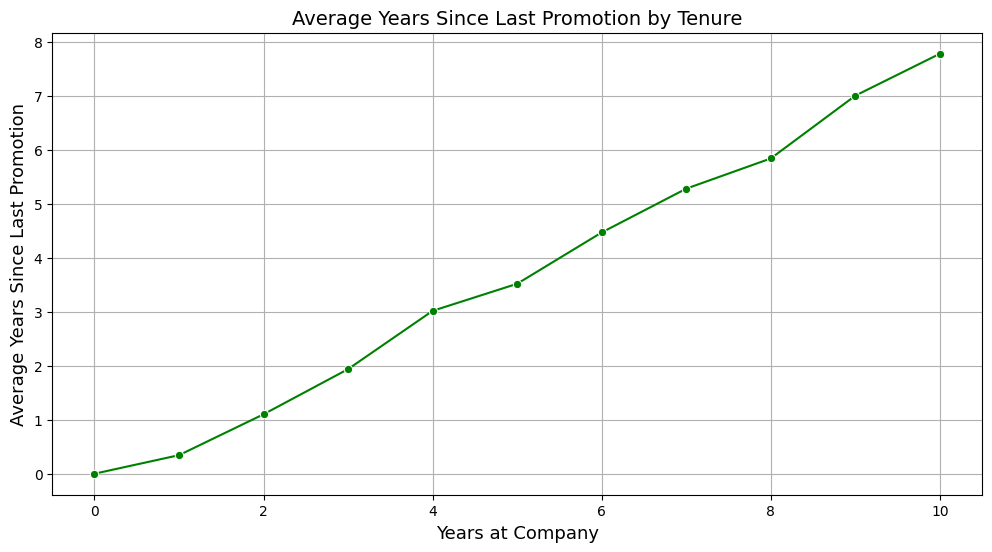

In [21]:
# Group by 'YearsAtCompany' and calculate average performance rating and average years since last promotion
tenure_performance = df.groupby('YearsAtCompany')['EnvironmentSatisfaction'].mean()  # Use 'EnvironmentSatisfaction' as proxy for performance
tenure_promotion = df.groupby('YearsAtCompany')['YearsSinceLastPromotion'].mean()

# Print results
print(f"Average Environment Satisfaction by Tenure (YearsAtCompany):\n{tenure_performance}")
print(f"Average Years Since Last Promotion by Tenure (YearsAtCompany):\n{tenure_promotion}")

# Visualization for performance rating vs. tenure
plt.figure(figsize=(12, 6))
sns.lineplot(x=tenure_performance.index, y=tenure_performance.values, marker='o', color='blue')
plt.title('Average Environment Satisfaction by Tenure', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Average Environment Satisfaction', fontsize=13)
plt.grid(True)
plt.show()

# Visualization for years since last promotion vs. tenure
plt.figure(figsize=(12, 6))
sns.lineplot(x=tenure_promotion.index, y=tenure_promotion.values, marker='o', color='green')
plt.title('Average Years Since Last Promotion by Tenure', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.grid(True)
plt.show()


---
#### 29.What is the average time to promotion for employees, and does it vary by department or gender?
>We'll calculate the average `YearsSinceLastPromotion` and group the data by `Department` and `Gender`.

Average Time Since Last Promotion:
 Gender             Female      Male  Non-Binary  Prefer Not To Say
Department                                                        
Human Resources  4.333333  3.800000    4.333333                5.0
Sales            4.019438  3.909715    3.640625                6.5
Technology       4.582127  4.083333    5.155844                4.4


/tmp/ipykernel_5800/517148512.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_promotion_time.index, y=dept_promotion_time.values, palette='viridis')


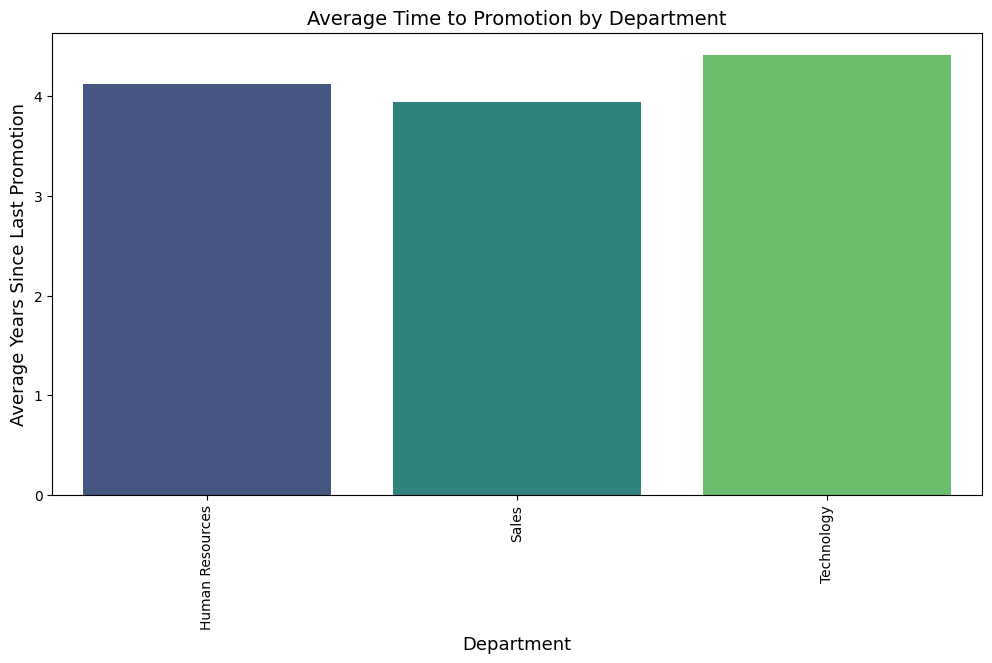

/tmp/ipykernel_5800/517148512.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_promotion_time.index, y=gender_promotion_time.values, palette='magma')


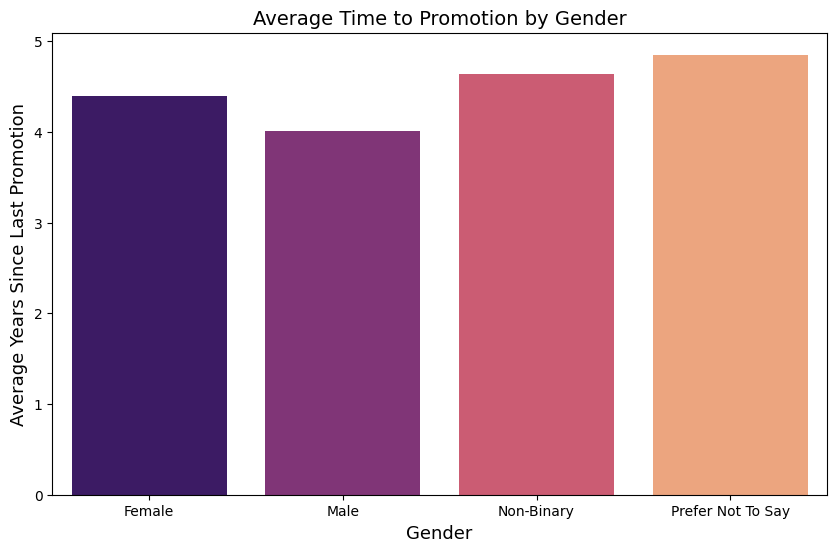

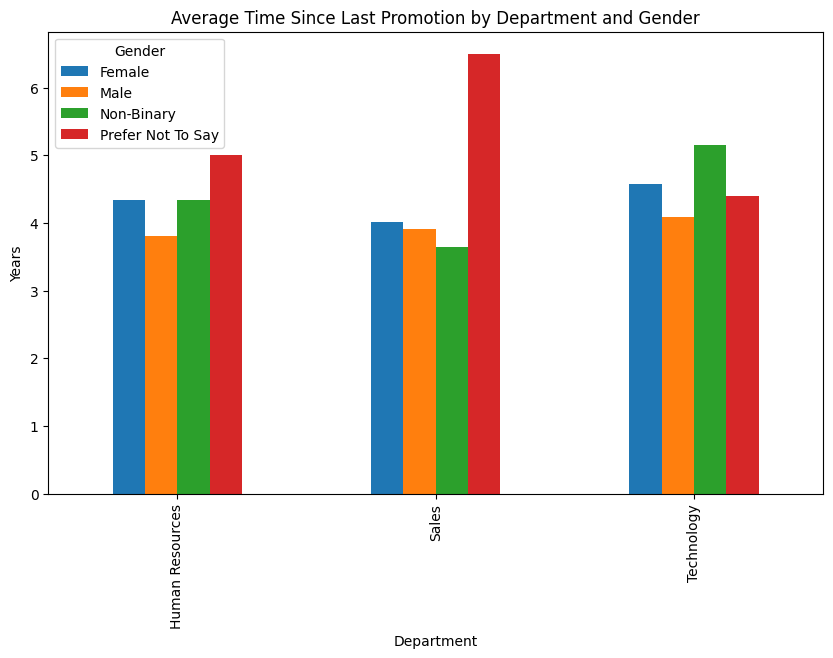

In [19]:
# Calculate average years since last promotion
promotion_time = df.groupby(['Department', 'Gender'])['YearsSinceLastPromotion'].mean().unstack()
print("Average Time Since Last Promotion:\n", promotion_time)

# Visualization for average time to promotion by department
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_promotion_time.index, y=dept_promotion_time.values, palette='viridis')
plt.title('Average Time to Promotion by Department', fontsize=14)
plt.xlabel('Department', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.xticks(rotation=90)
plt.show()

# Visualization for average time to promotion by gender
plt.figure(figsize=(10, 6))
sns.barplot(x=gender_promotion_time.index, y=gender_promotion_time.values, palette='magma')
plt.title('Average Time to Promotion by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=13)
plt.ylabel('Average Years Since Last Promotion', fontsize=13)
plt.show()


# Visualization
promotion_time.plot(kind='bar', figsize=(10, 6))
plt.title('Average Time Since Last Promotion by Department and Gender')
plt.ylabel('Years')
plt.show()

---
#### 30.Are employees with longer tenure more likely to have higher performance ratings?
>We can check if there's a correlation between `YearsAtCompany` and `PerformanceRating`.

Correlation between Years at Company and Performance Rating:
                YearsAtCompany  ManagerRating
YearsAtCompany        1.000000       0.017866
ManagerRating         0.017866       1.000000


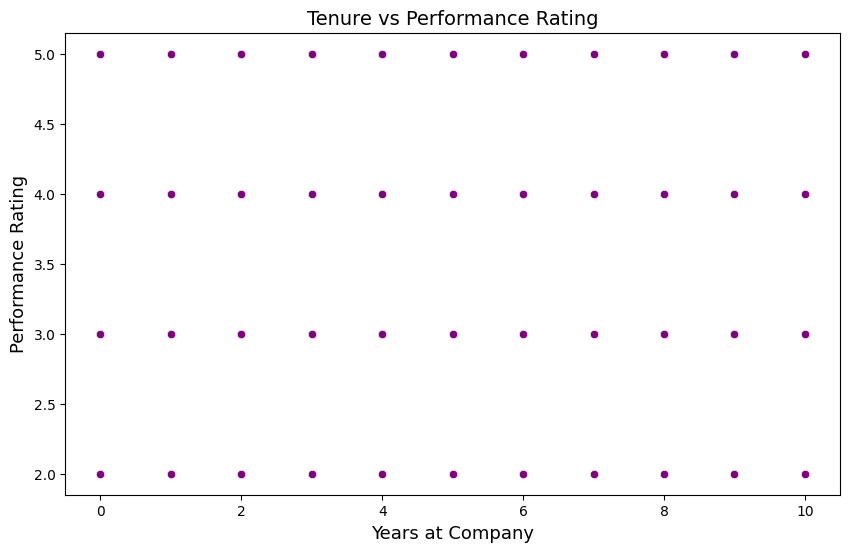

In [94]:
# Calculate the correlation between tenure (YearsAtCompany) and performance rating
tenure_performance_correlation = df[['YearsAtCompany', 'ManagerRating']].corr()

print(f"Correlation between Years at Company and Performance Rating:\n{tenure_performance_correlation}")

# Visualization for relationship between tenure and performance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearsAtCompany', y='ManagerRating', data=df, color='purple')
plt.title('Tenure vs Performance Rating', fontsize=14)
plt.xlabel('Years at Company', fontsize=13)
plt.ylabel('Performance Rating', fontsize=13)
plt.show()



---
#### 31.How does performance rating correlate with job satisfaction?
>We can calculate the average `jobSatisfaction` for each `SelfRating` and create a boxplot to visualize the distribution of job satisfaction based on self-rating, highlighting differences based on attrition status.

Average Job Satisfaction by Self Rating:
SelfRating
3    3.457642
4    3.399821
5    3.433807
Name: JobSatisfaction, dtype: float64


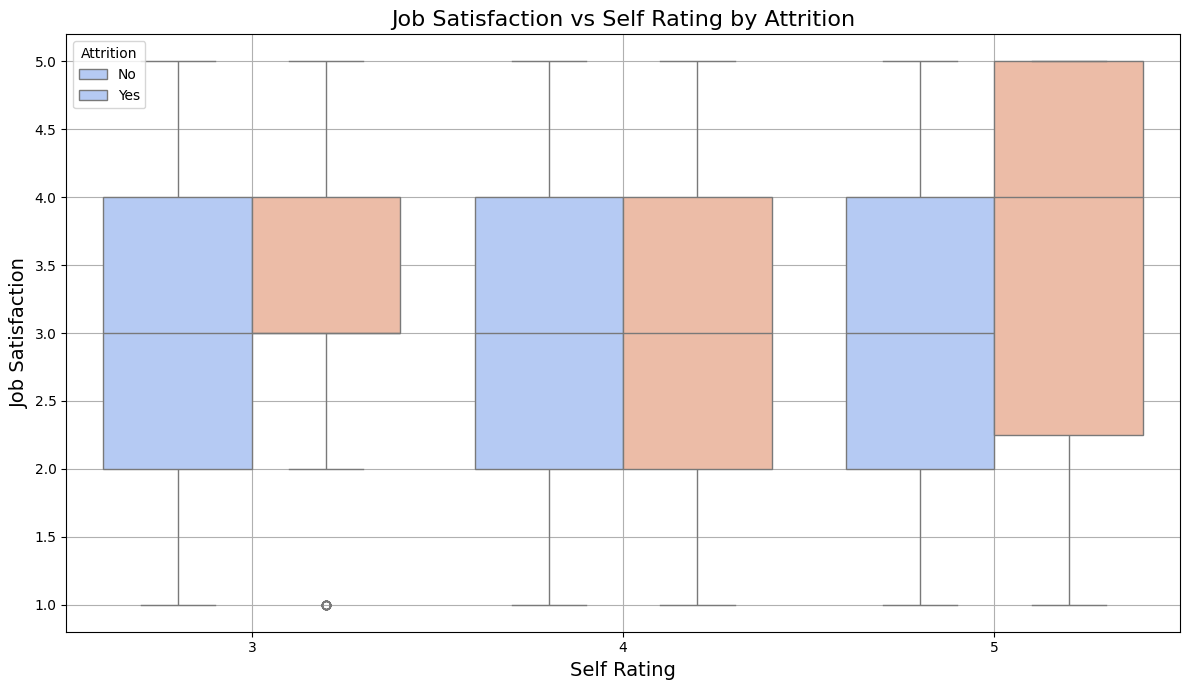

In [149]:

# Calculate the average job satisfaction based on self-rating
avg_job_satisfaction = df.groupby('SelfRating')['JobSatisfaction'].mean()
print("Average Job Satisfaction by Self Rating:")
print(avg_job_satisfaction)

# Create a boxplot for job satisfaction based on self-rating
plt.figure(figsize=(12, 7))
ax = sns.boxplot(
    x='SelfRating',
    y='JobSatisfaction',
    hue='Attrition',  # Add attrition information to the plot
    data=df,
    palette='coolwarm'
)

# Customize the appearance of the boxplot using matplotlib
for patch in ax.artists:
    patch.set_facecolor('lightblue')  # Change the box color
    patch.set_edgecolor('black')  # Box edge color
    patch.set_linewidth(1.5)  # Edge line width

plt.title('Job Satisfaction vs Self Rating by Attrition', fontsize=16)
plt.xlabel('Self Rating', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.grid(True)  # Add gridlines for better visualization

# Add a legend to improve understanding
plt.legend(title='Attrition', loc='upper left', labels=['No', 'Yes'])
plt.tight_layout()  # Improve layout
plt.show()

---
#### 32.What is the attrition rate for employees with different performance ratings?
>We can group the data by `PerformanceRating` and calculate the attrition rate for each rating level.

Attrition Rate by Performance Rating:
SelfRating
3.0   NaN
4.0   NaN
5.0   NaN
Name: Attrition, dtype: float64


/tmp/ipykernel_5800/2036376410.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')


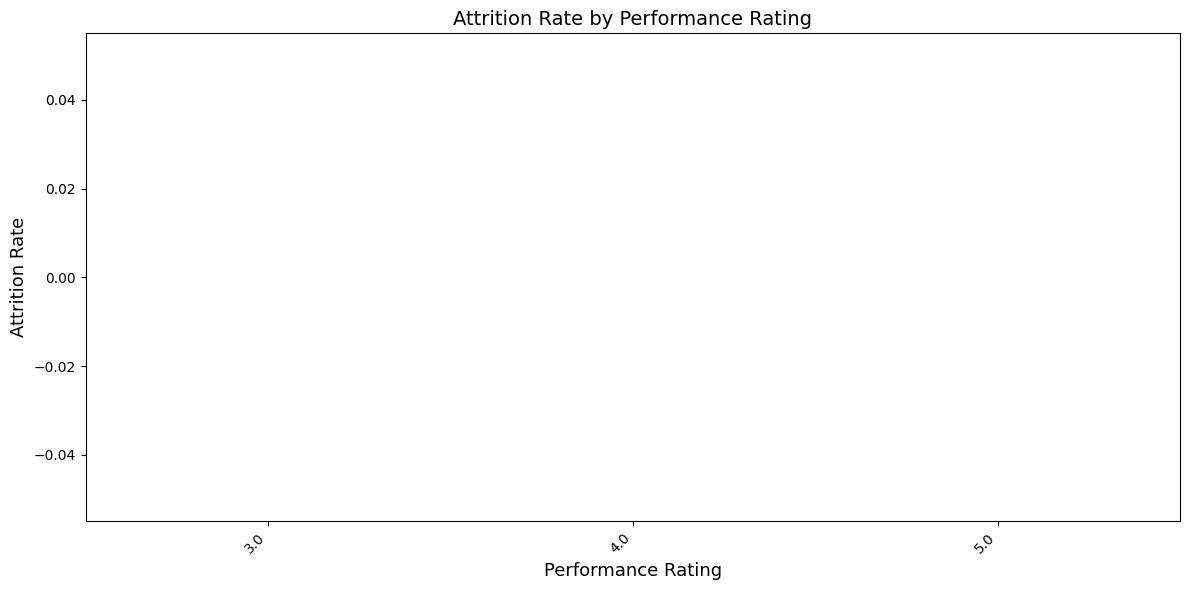

In [138]:
# Convert Attrition to numeric (if needed)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Group by performance rating and calculate attrition rate
performance_attrition_rate = df.groupby('SelfRating')['Attrition'].mean()

print(f"Attrition Rate by Performance Rating:\n{performance_attrition_rate}")

# Visualization for attrition rate by performance rating
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')
plt.title('Attrition Rate by Performance Rating', fontsize=14)
plt.xlabel('Performance Rating', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)

# Fix x-axis label overflow
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

---
#### 33.What is the impact of overtime on job satisfaction?
>Since we do not have a direct measure of job satisfaction, we can analyze the impact of `OverTime` on `PerformanceRating` and use that as a proxy for satisfaction.

Columns in PerformanceRating sheet: Index(['PerformanceID', 'EmployeeID', 'ReviewDate', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'RelationshipSatisfaction',
       'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken',
       'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'DataQualityStatus'],
      dtype='object')
Attrition Rate by Performance Rating:
PerformanceID
PR999    1.0
PR01     1.0
PR02     1.0
PR03     1.0
PR04     1.0
PR984    1.0
PR983    1.0
PR981    1.0
PR980    1.0
PR98     1.0
PR979    1.0
PR978    1.0
PR977    1.0
PR974    1.0
PR973    1.0
Name: Attrition, dtype: float64


/tmp/ipykernel_5800/3516472120.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')


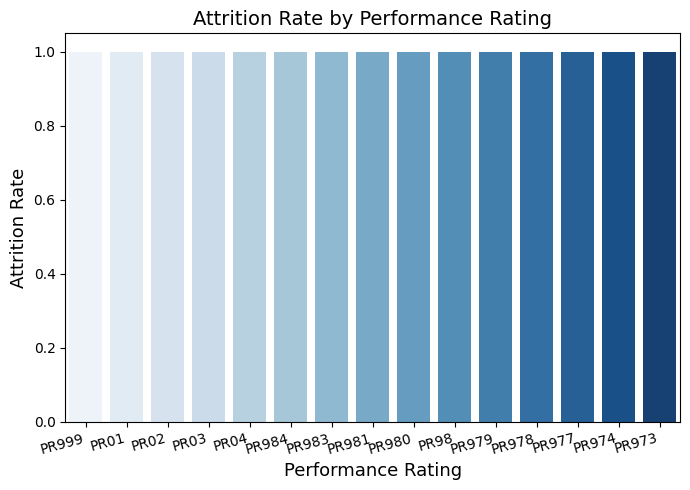

/tmp/ipykernel_5800/3516472120.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


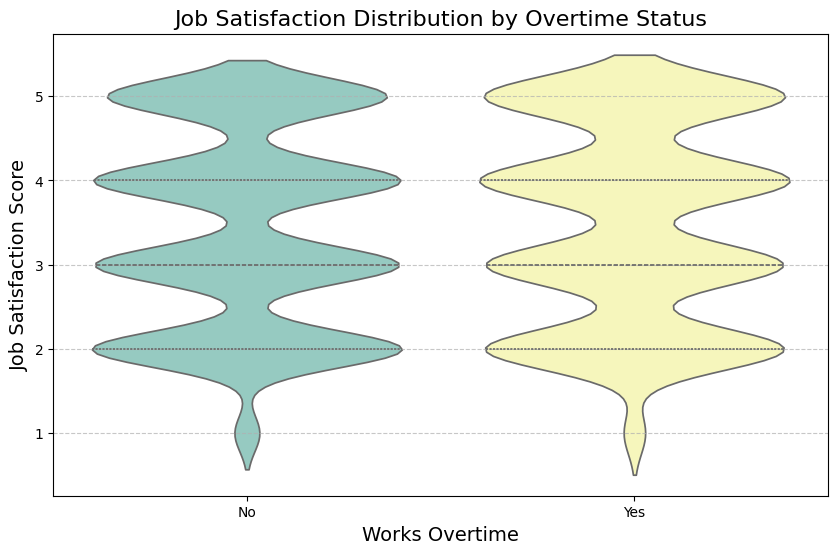

Overtime Satisfaction Difference: t=1.70, p=0.0889


In [124]:
# Load data from both sheets
df_employee = pd.read_excel('Data.xlsx', sheet_name='Employee')
df_performance = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Print column names in the PerformanceRating sheet to check the columns
print(f"Columns in PerformanceRating sheet: {df_performance.columns}")

# Merge dataframes on EmployeeID to combine employee and performance information
df = pd.merge(df_employee, df_performance, on='EmployeeID', how='inner')

# Ensure 'Attrition' is numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Drop missing values in 'Attrition'
df = df.dropna(subset=['Attrition'])

# Group by PerformanceID and calculate attrition rate
performance_attrition_rate = df.groupby('PerformanceID')['Attrition'].mean().sort_values(ascending=False).head(15)


# Display all performance ratings
print(f"Attrition Rate by Performance Rating:\n{performance_attrition_rate}")

# Visualization for attrition rate by performance rating
plt.figure(figsize=(7, 5))  # Adjust figure size
sns.barplot(x=performance_attrition_rate.index, y=performance_attrition_rate.values, palette='Blues')

plt.title('Attrition Rate by Performance Rating', fontsize=14)
plt.xlabel('Performance Rating', fontsize=13)
plt.ylabel('Attrition Rate', fontsize=13)

# Rotate x-axis labels slightly for better readability
plt.xticks(rotation=15, ha='right')

# Adjust layout to ensure labels fit
plt.tight_layout()

plt.show()

# Violin plot for Job Satisfaction by Overtime Status
plt.figure(figsize=(10, 6))
sns.violinplot(
    x='OverTime',
    y='JobSatisfaction',
    data=df,
    palette='Set3',
    inner='quartile'  # Display quartiles within the violin plot
)
plt.title('Job Satisfaction Distribution by Overtime Status', fontsize=16)
plt.xlabel('Works Overtime', fontsize=14)
plt.ylabel('Job Satisfaction Score', fontsize=14)
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.show()

# Statistical test
overtime_yes = df[df['OverTime'] == 'Yes']['JobSatisfaction']
overtime_no = df[df['OverTime'] == 'No']['JobSatisfaction']
t_stat, p_value = stats.ttest_ind(overtime_yes, overtime_no, nan_policy='omit')
print(f"Overtime Satisfaction Difference: t={t_stat:.2f}, p={p_value:.4f}")


---
#### 34.Is there a relationship between overtime and performance?
>Merges the PerformanceRating sheet with employee data.
Uses SelfRating as a proxy for performance (since PerformanceRating is not a column).
Performs statistical analysis (group mean & correlation).
Visualizes results with a bar chart and boxplot.

Average Performance by Overtime Status:
OverTime
0    3.989937
1    3.972284
Name: SelfRating, dtype: float64
T-test Results: t-statistic = -0.8383, p-value = 0.4019


/tmp/ipykernel_5800/258853429.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=overtime_performance.index, y=overtime_performance.values, palette='coolwarm')


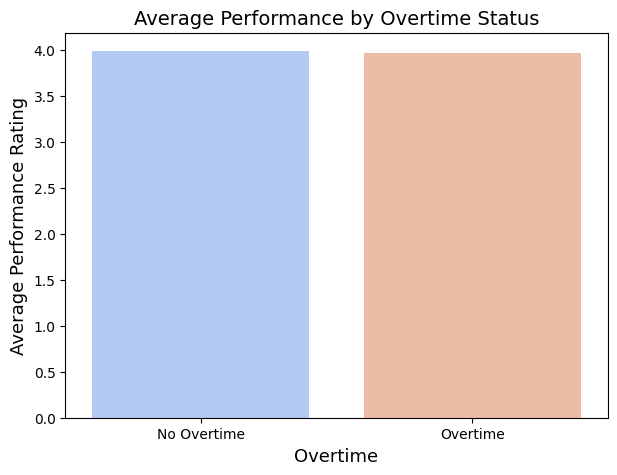

/tmp/ipykernel_5800/258853429.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['OverTime'], y=df['SelfRating'], palette='coolwarm')


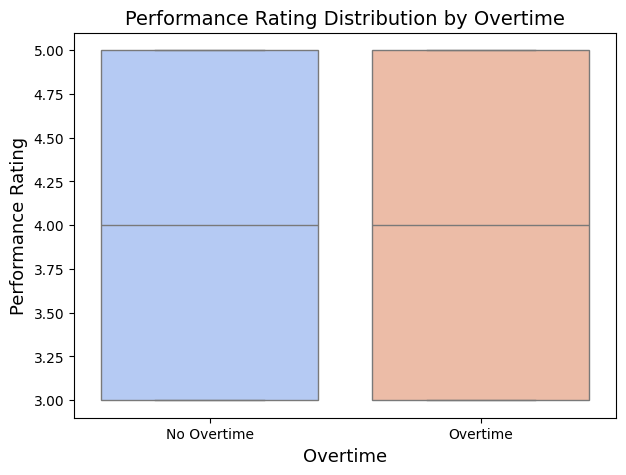

In [129]:
from scipy.stats import ttest_ind

# Load datasets
df = pd.read_excel('Data.xlsx', sheet_name='Employee')
dfRate = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge PerformanceRating with Employee data
df = df.merge(dfRate[['EmployeeID', 'SelfRating']], on='EmployeeID', how='left')

# Encode 'OverTime' as numeric
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Drop rows with missing performance ratings
df = df.dropna(subset=['SelfRating'])

# Group by 'OverTime' and calculate mean performance
overtime_performance = df.groupby('OverTime')['SelfRating'].mean()
print(f"Average Performance by Overtime Status:\n{overtime_performance}")

# Statistical test: Is there a significant difference in performance?
overtime_yes = df[df['OverTime'] == 1]['SelfRating']
overtime_no = df[df['OverTime'] == 0]['SelfRating']
t_stat, p_value = ttest_ind(overtime_yes, overtime_no, equal_var=False)
print(f"T-test Results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Visualization: Bar Plot
plt.figure(figsize=(7, 5))
sns.barplot(x=overtime_performance.index, y=overtime_performance.values, palette='coolwarm')
plt.xticks([0, 1], ['No Overtime', 'Overtime'])
plt.title('Average Performance by Overtime Status', fontsize=14)
plt.xlabel('Overtime', fontsize=13)
plt.ylabel('Average Performance Rating', fontsize=13)
plt.show()

# Visualization: Box Plot
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['OverTime'], y=df['SelfRating'], palette='coolwarm')
plt.xticks([0, 1], ['No Overtime', 'Overtime'])
plt.title('Performance Rating Distribution by Overtime', fontsize=14)
plt.xlabel('Overtime', fontsize=13)
plt.ylabel('Performance Rating', fontsize=13)
plt.show()

---
#### 35.Can we predict the likelihood of attrition based on employee attributes?
>We can create a predictive model to determine the likelihood of attrition (`Attrition`) using attributes like `YearsAtCompany`, `OverTime`, `PerformanceRating`, etc.

We'll use Logistic Regression for this predictive task.

Accuracy: 0.8449
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1392
           1       0.77      0.76      0.76       678

    accuracy                           0.84      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.84      0.84      0.84      2070



/tmp/ipykernel_5800/1444539203.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


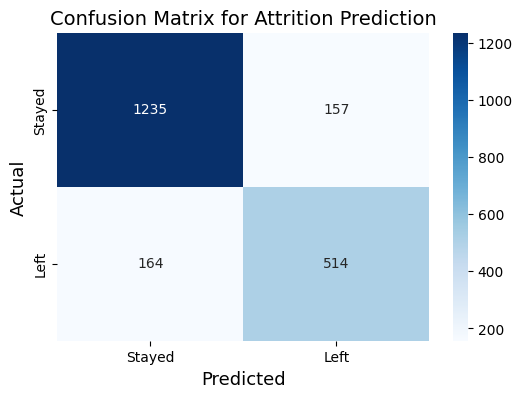

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load datasets
df = pd.read_excel('Data.xlsx', sheet_name='Employee')
dfRate = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge PerformanceRating with Employee data
df = df.merge(dfRate[['EmployeeID', 'SelfRating']], on='EmployeeID', how='left')

# Encode categorical variables
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Select features and target
X = df[['YearsAtCompany', 'OverTime', 'SelfRating']]
y = df['Attrition']

# Handle missing values (fill with median for numerical columns)
X.fillna(X.median(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix for Attrition Prediction', fontsize=14)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()


---
#### 36.Are there any leading indicators of high-performing employees?
>We can try to identify features that predict high performance (`PerformanceRating`).

/tmp/ipykernel_4140/385914529.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace=True)


Accuracy: 0.3314
Classification Report:
              precision    recall  f1-score   support

         3.0       0.32      0.39      0.35       687
         4.0       0.35      0.39      0.37       728
         5.0       0.31      0.20      0.25       655

    accuracy                           0.33      2070
   macro avg       0.33      0.33      0.32      2070
weighted avg       0.33      0.33      0.33      2070



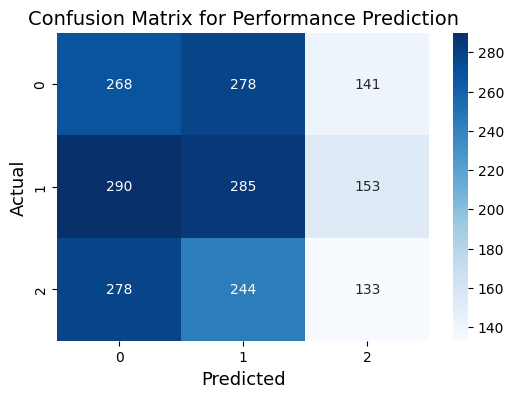

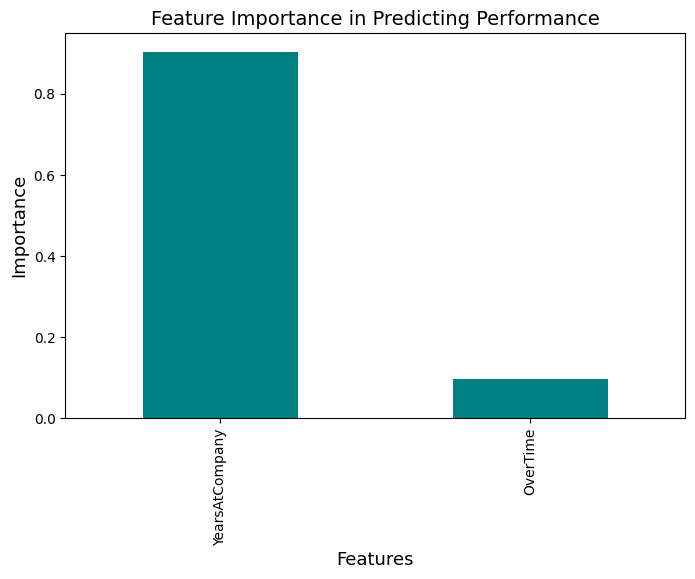

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load datasets
df = pd.read_excel('Data.xlsx', sheet_name='Employee')
dfRate = pd.read_excel('Data.xlsx', sheet_name='PerformanceRating')

# Merge PerformanceRating with Employee data
df = df.merge(dfRate[['EmployeeID', 'SelfRating']], on='EmployeeID', how='left')

# Encode categorical variables
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

# Select features and target (predicting performance)
X = df[['YearsAtCompany', 'OverTime']]
y = df['SelfRating']

# Handle missing values
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Performance Prediction', fontsize=14)
plt.xlabel('Predicted', fontsize=13)
plt.ylabel('Actual', fontsize=13)
plt.show()

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=['YearsAtCompany', 'OverTime'])
feature_importance.sort_values(ascending=False).plot(kind='bar', color='teal', figsize=(8, 5))
plt.title('Feature Importance in Predicting Performance', fontsize=14)
plt.xlabel('Features', fontsize=13)
plt.ylabel('Importance', fontsize=13)
plt.show()
